# Libraries

In [250]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import re

# Import Data

In [218]:
train=pd.read_csv("train_jqd04QH.csv")
test=pd.read_csv("test_KaymcHn.csv")

# Data Preprocessing

In [219]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


In [220]:
train1=train.copy()

In [221]:
train1.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4098
relevent_experience          0
enrolled_university        342
education_level            457
major_discipline          2838
experience                  59
company_size              4779
company_type              5039
last_new_job               367
training_hours               0
target                       0
dtype: int64

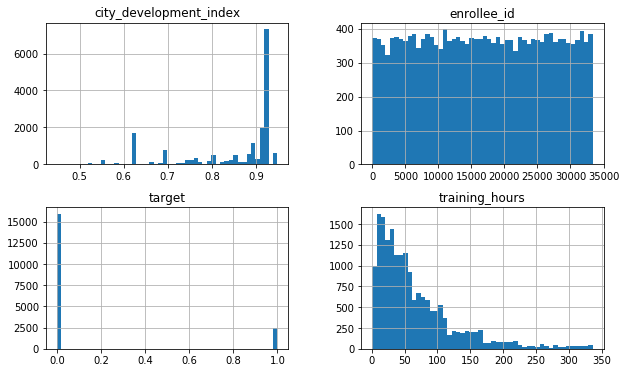

In [222]:
train1.hist(figsize=(10,6),bins=50)
plt.show()

(4.5, -0.5)

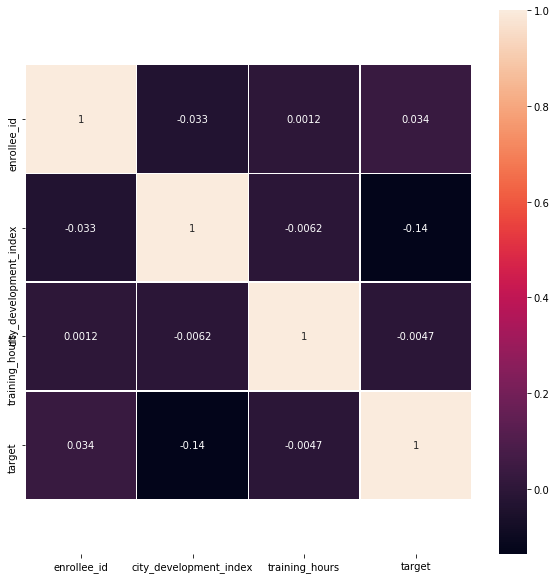

In [223]:
import sys
fig, ax = plt.subplots(figsize=(10,10))
ht=sns.heatmap(train1.corr(),annot=True,linewidths=0.5,ax=ax)
bottom,top=ht.get_ylim()
ht.set_ylim(bottom+0.5,top-0.5)

In [224]:
# Imputing Missing values with Mode since all the categorical variables
train1['gender']=train1['gender'].fillna(train1['gender'].mode()[0])

In [225]:
train1['enrolled_university'].fillna(train1['enrolled_university'].mode()[0],inplace=True)
train1['education_level'].fillna(train1['education_level'].mode()[0],inplace=True)
train1['major_discipline'].fillna(train1['major_discipline'].mode()[0],inplace=True)
train1['experience'].fillna(train1['experience'].mode()[0],inplace=True)
train1['company_size'].fillna(train1['company_size'].mode()[0],inplace=True)
train1['company_type'].fillna(train1['company_type'].mode()[0],inplace=True)
train1['last_new_job'].fillna(train1['last_new_job'].mode()[0],inplace=True)

In [226]:
train1.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,Male,No relevent experience,no_enrollment,Masters,STEM,8,50-99,Pvt Ltd,2,88,1


In [227]:
train1.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [230]:
train1.describe

<bound method NDFrame.describe of        enrollee_id      city  city_development_index  gender  \
0            23798  city_149                   0.689    Male   
1            29166   city_83                   0.923    Male   
2               46   city_16                   0.910    Male   
3            18527   city_64                   0.666    Male   
4            21751  city_100                   0.887    Male   
...            ...       ...                     ...     ...   
18354        25366  city_103                   0.920    Male   
18355        25545  city_160                   0.920    Male   
18356        11514  city_114                   0.926    Male   
18357         1689   city_75                   0.939    Male   
18358         5995  city_105                   0.794  Female   

           relevent_experience enrolled_university education_level  \
0      Has relevent experience       no_enrollment        Graduate   
1      Has relevent experience       no_enrollment       

# Univariate Analysis 

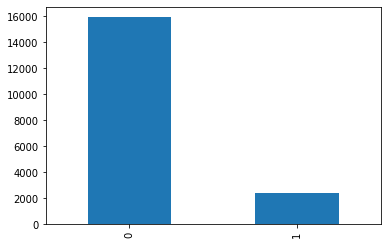

In [21]:
#Majority of them are not looking for job change
train1['target'].value_counts().plot.bar()

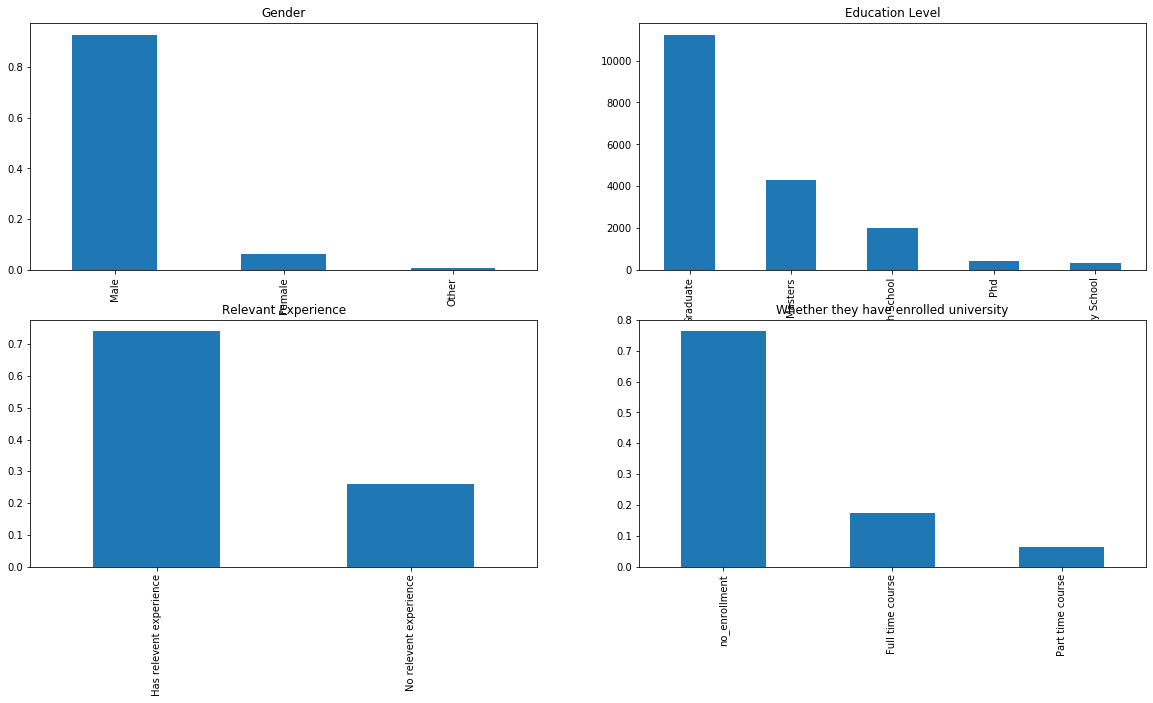

In [23]:
plt.subplot(221)
train1['gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Gender")
plt.subplot(222)
train1['education_level'].value_counts().plot.bar(figsize=(20,10),title="Education Level")
plt.subplot(223)
train1['relevent_experience'].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Relevant Experience")
plt.subplot(224)
train1['enrolled_university'].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Whether they have enrolled university")
plt.show()

# Analysis
#Most of the candidates are Male with Graduate degrees and relevant experience

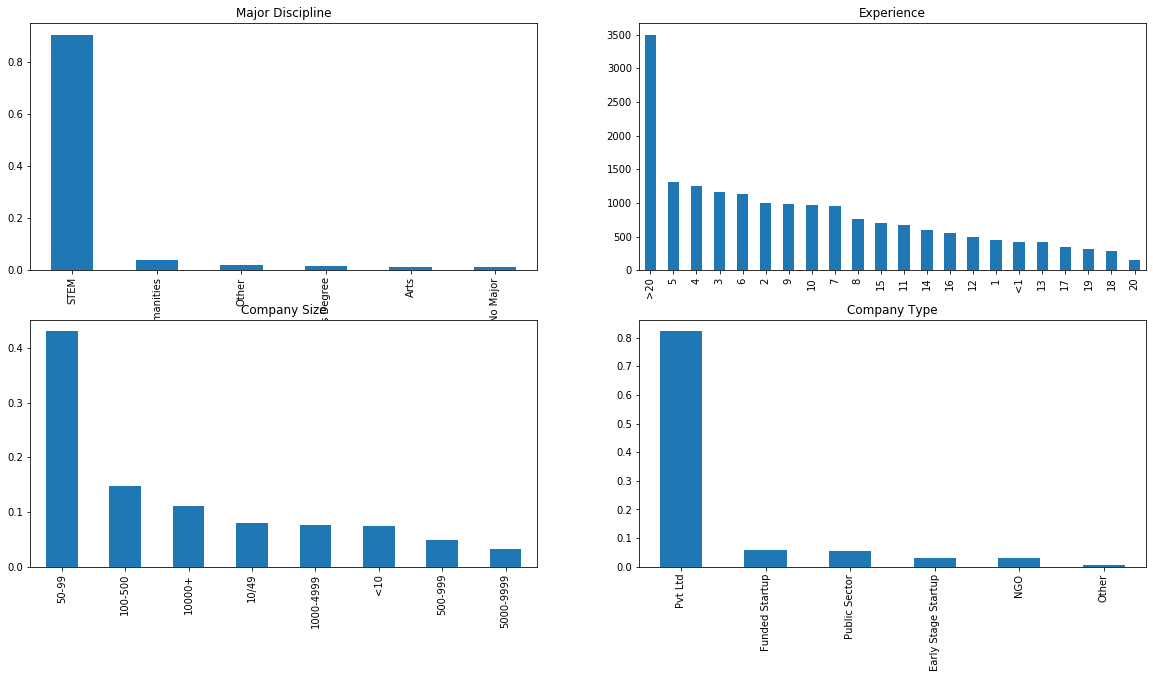

In [24]:
plt.subplot(221)
train1['major_discipline'].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Major Discipline")
plt.subplot(222)
train1['experience'].value_counts().plot.bar(figsize=(20,10),title="Experience")
plt.subplot(223)
train1['company_size'].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Company Size")
plt.subplot(224)
train1['company_type'].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Company Type")
plt.show()

# Analysis: 
#Most of the applicants have experience more than 20 years and Majors in Discipline in STEM
#Majority are working in Pvt Ltd.

# Multivariate Analysis

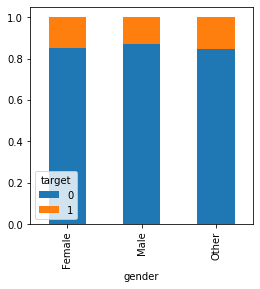

In [25]:
gender=pd.crosstab(train1['gender'],train['target'])
gender.div(gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

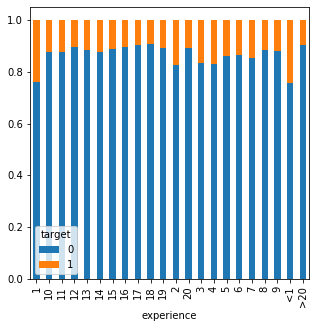

In [27]:
experience=pd.crosstab(train1['experience'],train1['target'])
experience.div(experience.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,5))

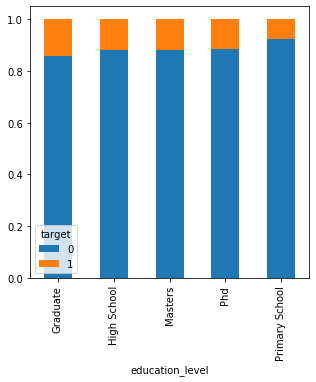

In [28]:
education_level=pd.crosstab(train1['education_level'],train1['target'])
education_level.div(education_level.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,5))

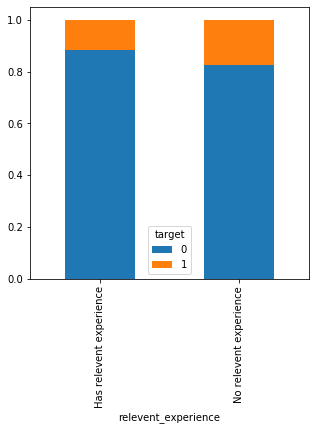

In [29]:
relevent_experience=pd.crosstab(train1['relevent_experience'],train1['target'])
relevent_experience.div(relevent_experience.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,5))

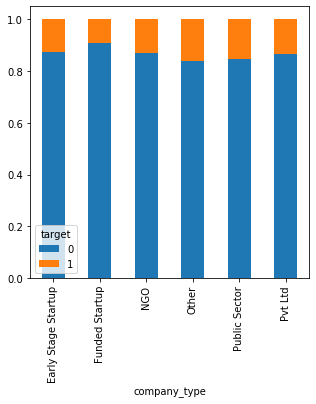

In [30]:
company_type=pd.crosstab(train1['company_type'],train1['target'])
company_type.div(company_type.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,5))

# Train Test Split

In [231]:
y=train1.target
X=train1

In [232]:
X.drop(['target'],axis=1,inplace=True)

In [233]:
X.drop(['enrollee_id'],axis=1,inplace=True)

In [234]:
X=pd.get_dummies(X)
X1=X.copy()

In [235]:
X.head()

,city_development_index,training_hours,city_city_1,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,city_city_105,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,0.689,106,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,0.923,69,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.910,4,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0.666,26,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.887,88,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [236]:
#to undersample the imbalanced data . Previous results showed AUC less than 0.5 due to imbalance
rus = RandomUnderSampler(random_state=0)
rus.fit(X, y)
X_resampled, y_resampled = rus.fit_sample(X, y)

In [237]:
X.head()

,city_development_index,training_hours,city_city_1,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,city_city_105,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,0.689,106,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,0.923,69,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.910,4,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0.666,26,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.887,88,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [238]:
x_train,x_cv,y_train,y_cv=train_test_split(X_resampled, y_resampled,test_size=0.3)

# Logistic Regression

In [180]:
model=LogisticRegression(solver='liblinear')
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [181]:
pred_cv=model.predict(x_cv)
pred_cv_prob=model.predict_proba(x_cv)[:,1]

In [182]:
accuracy_score(y_cv,pred_cv)

0.6466896768120489

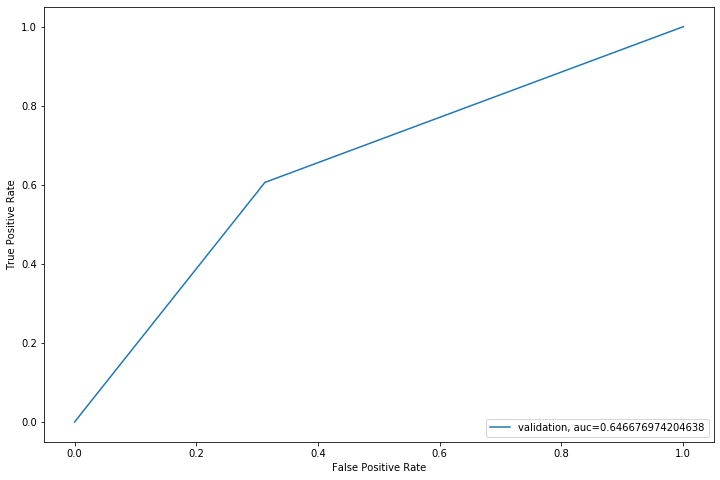

In [183]:
fpr, tpr, _ = roc_curve(y_cv,  pred_cv)
auc = roc_auc_score(y_cv,  pred_cv)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

# Random Forest Classifier

In [184]:
clf=RandomForestClassifier(n_estimators=150,max_leaf_nodes=2,criterion='entropy')

In [185]:
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=2,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [186]:
pred_clf=clf.predict(x_cv)

In [187]:
accuracy_score(y_cv,pred_clf)

0.7046334065474322

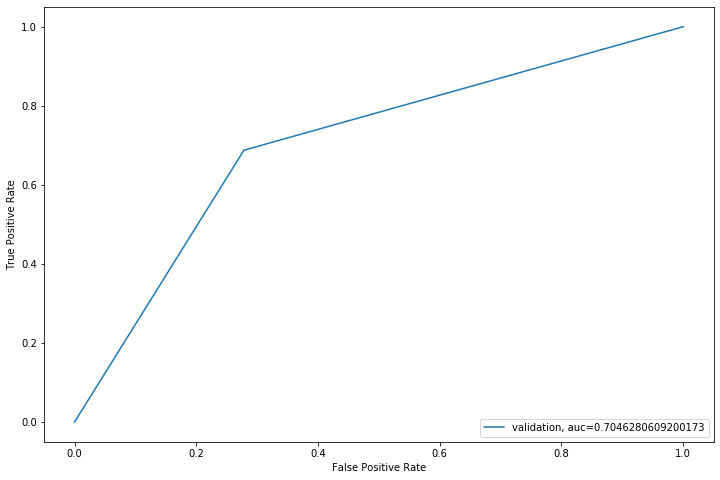

In [188]:
fpr, tpr, _ = roc_curve(y_cv,  pred_clf)
auc = roc_auc_score(y_cv,  pred_clf)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

# KNN model

In [189]:
KNN_model=KNeighborsClassifier(n_neighbors=5,algorithm="brute")

In [190]:
KNN_model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [191]:
pred_knn=KNN_model.predict(x_cv)

In [192]:
accuracy_score(y_cv,pred_knn)

0.6942788411254053

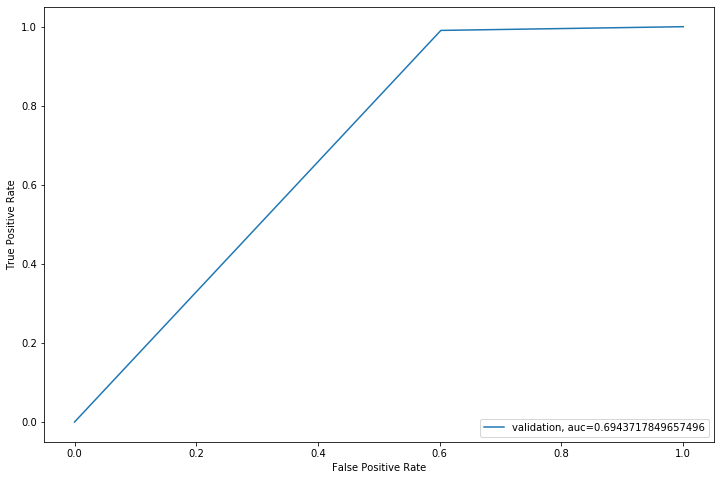

In [193]:
fpr, tpr, _ = roc_curve(y_cv,  pred_knn)
auc = roc_auc_score(y_cv,  pred_knn)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

# XGB Classifier

In [194]:
xgb = XGBClassifier(n_estimators=50, max_depth=4)
xgb.fit(x_train,y_train)
pred_test = xgb.predict(x_cv)

In [195]:
accuracy_score(y_cv,pred_test)

0.9195690827319318

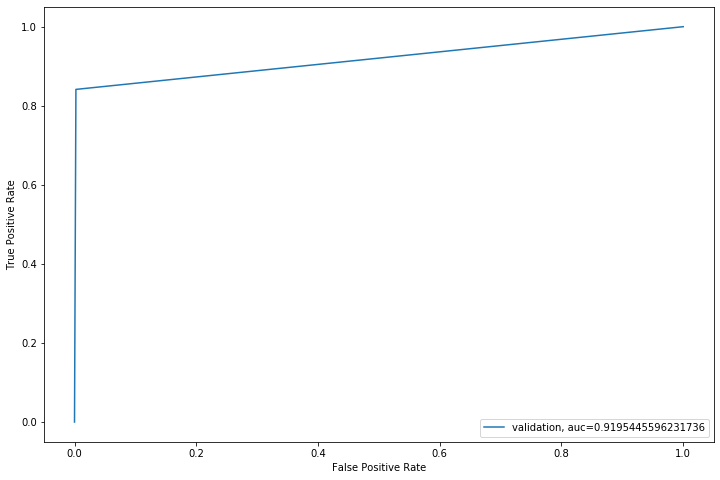

In [196]:
fpr, tpr, _ = roc_curve(y_cv,  pred_test)
auc = roc_auc_score(y_cv,  pred_test)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

# Recommendation :
Highest AUC score is via XGB Classifier so it should be first preference for modelling

# Prediction on Test Data

In [239]:
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16548,city_33,0.448,NaN,No relevent experience,Full time course,Graduate,STEM,<1,1000-4999,Public Sector,NaN,15
1,12036,city_28,0.939,Male,No relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,94
2,11061,city_103,0.920,Male,No relevent experience,Full time course,Graduate,STEM,3,NaN,NaN,1,17
3,5032,city_104,0.924,Male,No relevent experience,no_enrollment,Phd,STEM,>20,50-99,Pvt Ltd,2,76
4,17599,city_77,0.830,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,<10,Pvt Ltd,2,65


In [240]:
test.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    3388
relevent_experience          0
enrolled_university        279
education_level            395
major_discipline          2393
experience                  44
company_size              4051
company_type              4330
last_new_job               304
training_hours               0
dtype: int64

In [241]:
test['enrolled_university'].fillna(test['enrolled_university'].mode()[0],inplace=True)
test['education_level'].fillna(test['education_level'].mode()[0],inplace=True)
test['major_discipline'].fillna(test['major_discipline'].mode()[0],inplace=True)
test['experience'].fillna(test['experience'].mode()[0],inplace=True)
test['company_size'].fillna(test['company_size'].mode()[0],inplace=True)
test['company_type'].fillna(test['company_type'].mode()[0],inplace=True)
test['last_new_job'].fillna(test['last_new_job'].mode()[0],inplace=True)
test['gender']=train1['gender'].fillna(test['gender'].mode()[0])

In [242]:
test.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

In [243]:
enrollee_id=test.enrollee_id

In [244]:
test.drop(['enrollee_id'],axis=1,inplace=True)

In [245]:
test=pd.get_dummies(test)

In [246]:
test.head()

,city_development_index,training_hours,city_city_1,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,city_city_105,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,0.448,15,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,0.939,94,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,0.920,17,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0.924,76,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
4,0.830,65,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [248]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [251]:
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

In [252]:
test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in test.columns.values]

In [255]:
# Training data is in numpy array format so converting the same for the test data too
test = np.array(test)

In [256]:
pred_test = xgb.predict(test)

In [257]:
pred_test

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

# Submission with XGBoost Results

In [258]:
submission1=pd.DataFrame(index=enrollee_id)
submission1["target"]=pred_test

#Saving into csv
submission1.to_csv("Submission1.csv")

# Prediction on Test using Random Forest

In [259]:
pred_test2=clf.predict(test)

In [260]:
submission2=pd.DataFrame(index=enrollee_id)
submission2["target"]=pred_test

#Saving into csv
submission2.to_csv("Submission2.csv")